In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')

In [2]:
df = pd.concat([
    pd.read_csv('./accuracy-2020-05-04T01:31:19.081576.csv', index_col=0),
    pd.read_csv('./accuracy-2020-05-04T01:39:22.083753.csv', index_col=0),
    pd.read_csv('./accuracy-2020-05-04T02:03:14.881586.csv', index_col=0),
])
df['experiment'] = df.index // 2

In [3]:
df.head()

,n_nodes,n_edges,n_unique_training,model,accuracy,experiment
0,12,64,1,linear program,0.469697,0
1,12,64,1,recursive logit,0.333333,0
2,12,64,2,linear program,0.507576,1
3,12,64,2,recursive logit,0.833333,1
4,12,64,3,linear program,0.462121,2


In [4]:
print(f"Collected data from {len(df)//2} experiments")

Collected data from 2090 experiments


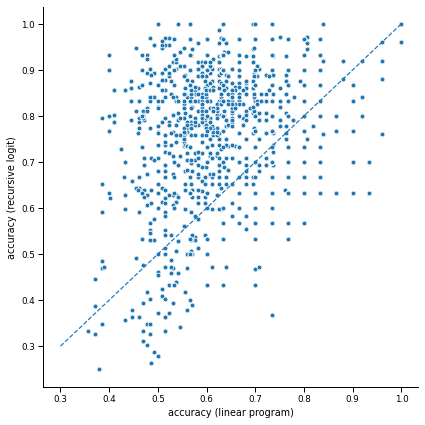

In [5]:
by_model = pd.DataFrame({f"accuracy ({key})": df.loc[idx].accuracy.values
            for key, idx in df.groupby('model').groups.items()
           })
by_model['number of nodes'] = df.groupby('experiment').n_nodes.min()
sns.relplot('accuracy (linear program)', 'accuracy (recursive logit)',
            data=by_model, height=6)
plt.plot([0.3, 1], [0.3, 1], '--')
None

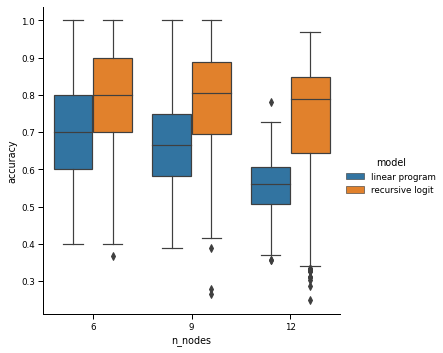

In [6]:
sns.catplot(x='n_nodes', y='accuracy',  
            hue='model',
            kind='box',
            data=df)

In [7]:
df_large = df[df.n_nodes==12]

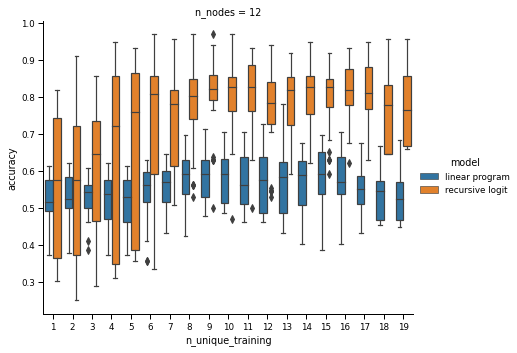

In [8]:
sns.catplot(x='n_unique_training', y='accuracy',
           hue='model',
           row='n_nodes', kind='box',
           data=df_large,
           height=5, aspect=1.2)